In [32]:
import numpy as np
from datascience import *
import datetime as dt

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import requests

In [30]:
apple = Table.read_table('AAPL (1).csv')
ge=  Table.read_table('GE.csv')
google=  Table.read_table('GOOG.csv')
nike=  Table.read_table('NKE.csv')
tesla=  Table.read_table('TSLA.csv')
apple.show(10)

Date,Open,High,Low,Close,Adj Close,Volume
2017-09-07,162.09,162.24,160.36,161.26,161.26,21928500
2017-09-08,160.86,161.15,158.53,158.63,158.63,28611500
2017-09-11,160.5,162.05,159.89,161.5,161.5,31580800
2017-09-12,162.61,163.96,158.77,160.86,160.86,71714000
2017-09-13,159.87,159.96,157.91,159.65,159.65,44907400
2017-09-14,158.99,159.4,158.09,158.28,158.28,23760700
2017-09-15,158.47,160.97,158,159.88,159.88,49114600
2017-09-18,160.11,160.5,158,158.67,158.67,28269400
2017-09-19,159.51,159.77,158.44,158.73,158.73,20810600
2017-09-20,157.9,158.26,153.83,156.07,156.07,52951400


In [31]:
date_conv = lambda stringdate :[dt.datetime.strptime(d,'%Y-%m-%d').date() for d in stringdate]
(apple.column(1)+apple.column(4))/2

array([ 161.6749955,  159.745003 ,  161.       ,  161.735001 ,
        159.7599945,  158.635002 ,  159.175003 ,  159.3899995,
        159.1199955,  156.9850005,  154.595001 ,  151.714996 ,
        150.270004 ,  152.459999 ,  154.0149995,  153.584999 ,
        153.665001 ,  154.0349965,  154.2449955,  153.5550005,
        154.784996 ,  155.135002 ])

In [27]:
apple_date = (Table().with_columns('Date', date_conv(apple.column(0)), 'High', apple.column(2), 
                                   'Low', apple.column(3), 'Open', apple.column(1),'Close', apple.column(4), 
                                   'Mean', (apple.column(1)+apple.column(4))/2))

In [28]:
apple_date.show(10)

Date,High,Low,Open,Close,Mean
2017-07-07,144.75,142.9,142.9,144.18,143.54
2017-07-10,145.95,143.37,144.11,145.06,144.585
2017-07-11,145.85,144.38,144.73,145.53,145.13
2017-07-12,146.18,144.82,145.87,145.74,145.805
2017-07-13,148.49,145.44,145.5,147.77,146.635
2017-07-14,149.33,147.33,147.97,149.04,148.505
2017-07-17,150.9,148.57,148.82,149.56,149.19
2017-07-18,150.13,148.67,149.2,150.08,149.64
2017-07-19,151.42,149.95,150.48,151.02,150.75
2017-07-20,151.74,150.19,151.5,150.34,150.92


(array([ 736525.,  736539.,  736553.,  736567.,  736581.,  736595.,  736609.]),
 <a list of 7 Text xticklabel objects>)

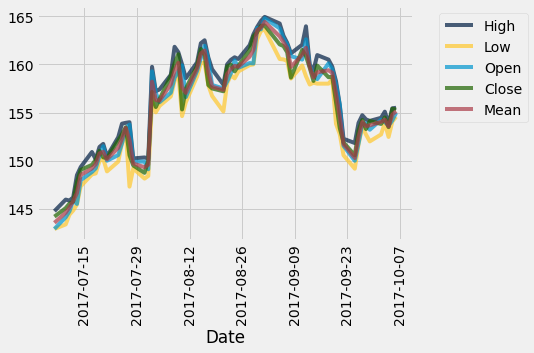

In [29]:
apple_date.plot(0)
plt.xticks(rotation=90)

In [ ]:
var url = "https://api.nytimes.com/svc/search/v2/articlesearch.json";
url += '?' + $.param({
  'api-key': "28ec5f20ab074501b55d83ea93cec91b",
  'q': "apple"
});
$.ajax({
  url: url,
  method: 'GET',
}).done(function(result) {
  console.log(result);
}).fail(function(err) {
  throw err;
});

In [73]:
data_search = requests.get("https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=28ec5f20ab074501b55d83ea93cec91b&q=apple&begin_date=20170801&end_date=20170802")
data_search.json()

{'copyright': 'Copyright (c) 2017 The New York Times Company. All Rights Reserved.',
 'response': {'docs': [{'_id': '5980ee5a95d0e0246f1fd903',
    'blog': {},
    'byline': {'original': 'By VINDU GOEL'},
    'document_type': 'article',
    'headline': {'main': 'Apple Sales Exceed Expectations as Buyers Wait for New iPhones',
     'print_headline': 'Apple’s Revenue and Profits Rise Even as Buyers Wait for New iPhones'},
    'keywords': [{'isMajor': 'N',
      'name': 'organizations',
      'rank': 1,
      'value': 'Apple Inc'},
     {'isMajor': 'N', 'name': 'subject', 'rank': 2, 'value': 'iPhone'},
     {'isMajor': 'N',
      'name': 'subject',
      'rank': 3,
      'value': 'Company Reports'},
     {'isMajor': 'N',
      'name': 'subject',
      'rank': 4,
      'value': 'Computers and the Internet'}],
    'multimedia': [{'height': 384,
      'legacy': {'xlarge': 'images/2017/08/02/business/02apple1/02apple1-articleLarge.jpg',
       'xlargeheight': 384,
       'xlargewidth': 600},


In [70]:
test_headline= data_search.json()['response']['docs'][0]['headline']['print_headline']
test_headline

'Apple’s Revenue and Profits Rise Even as Buyers Wait for New iPhones'

In [71]:
test_url= data_search.json()['response']['docs'][0]['web_url']
test_url

'https://www.nytimes.com/2017/08/01/technology/apple-iphone-earnings.html'

In [72]:
test_date= data_search.json()['response']['docs'][0]['pub_date']
test_date

'2017-08-01T21:10:45+0000'

In [74]:
def article_extract(article):
    return {'Name': article['headline']['print_headline'], 
            'URL': article['web_url'],
            'Date-Time': article['pub_date']
        
    }
    
article_extract(data_search.json()['response']['docs'][0])

{'Date-Time': '2017-08-01T21:10:45+0000',
 'Name': 'Apple’s Revenue and Profits Rise Even as Buyers Wait for New iPhones',
 'URL': 'https://www.nytimes.com/2017/08/01/technology/apple-iphone-earnings.html'}

In [61]:
def article_search(term):
    data_search = requests.get("https://api.nytimes.com/svc/search/v2/articlesearch.json?api-key=28ec5f20ab074501b55d83ea93cec91b&q=%s"%term)
    return article_extract(data_search.json()['response']['docs'][0])

In [62]:
article_search('google')

{'web_url': 'https://topics.nytimes.com/topic/company/alphabet-inc', 'snippet': 'News about Google Inc., including commentary and archival articles published in The New York Times.', 'blog': {}, 'multimedia': [], 'headline': {'main': 'Google Inc.'}, 'keywords': [], 'document_type': 'topic', 'type_of_material': 'timestopic', '_id': '56dff14838f0d836dc03655a', 'word_count': 15, 'score': 3.5241082}


KeyError: 'print_headline'